# Installing & loading required packages

In [16]:
! pip3 install pandas
! pip3 install lifelines

     |████████████████████████████████| 5.3MB 2.3MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for unknown: filename=UNKNOWN-2.0.3-cp38-cp38-macosx_10_14_6_x86_64.whl size=13414157 sha256=b8eb05f0ecff076c9fa440e9e32c97e86d47bf65e83ecbde3da3418d9d5f176a
  Stored in directory: /Users/Danial/Library/Caches/pip/wheels/9b/32/12/8ca279a1234bc2cf5d57e6a90d1dab7bd3d76f6249c6e30474
error
  ERROR: Failed building wheel for unknown
  Running setup.py clean for unknown
  ERROR: Command errored out with exit status 1:
   command: /Library/Developer/CommandLineTools/usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/dz/h73npvns6dscvynm6d4050wc0000gn/T/pip-install-j3zzaqly/unknown/setup.py'"'"'; __file__='"'"'/private/var/folders/dz/h73npvns6dscvynm6d4050wc0000gn/T/pip-install-j3zzaqly/unknown/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', o

In [1]:
import pandas as pd
from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt

# Survival function

The survival function $S(t)$, is defined as the probability that an event-of-interest occurs after a certain time $t$. 
$$
S(t) = P(T > t)
$$
where $T$ is the time at which the event occurs. There are wide variaity of methods to estimate the survival function, a widely used method of wich is Kaplan-Meier.

$$
\hat S(t) = \prod_{t_i<t} \frac{n_i-d_i}{d_i}
$$

where $d_i$ are the number of occured events (death) at time $t$ and $n_i$ is the number of subjects at risk of death just prior to time $t$.



## Example 1

T | d | n
---|---|---


In [2]:
data = {
    'T': [0, 3, 4, 6, 7, 8, 10, 11, 13],
    'd': [0, 1, 2, 1, 2, 1, 1, 1, 1, ],
    'n': [10, 10, 9, 7, 6, 4, 3, 2, 1]
}
df = pd.DataFrame(data)
df

,T,d,n
0,0,0,10
1,3,1,10
2,4,2,9
3,6,1,7
4,7,2,6
5,8,1,4
6,10,1,3
7,11,1,2
8,13,1,1


In [12]:
pd.__version__

'1.2.1'

In [10]:
data = {
    'T': [3, 4, 4, 6, 7, 7, 8, 10, 11, 13],
    'E': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ],
}


df = pd.DataFrame(data).reset_index()
df

,index,T,E
0,0,3,1
1,1,4,1
2,2,4,1
3,3,6,1
4,4,7,1
5,5,7,1
6,6,8,1
7,7,10,1
8,8,11,1
9,9,13,1


<AxesSubplot:xlabel='timeline'>

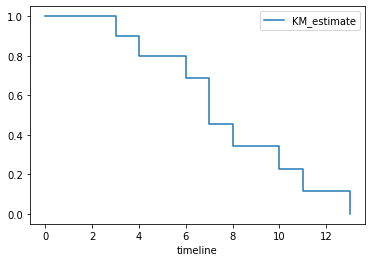

In [5]:
kmf = KaplanMeierFitter()
kmf.fit(df['T'], df['E'])
kmf.plot(ci_show=False)

In [ ]:
data_censor = {
    'T': [3, 4, 4, 6, 7, 7, 8, 10, 11, 13],
    'E': [1, 1, 0, 1, 1, 1, 1, 1, 1, 1 ],
}

In [6]:
kmf.survival_function_.reset_index()

,timeline,KM_estimate
0,0.0,1.000000
1,3.0,0.900000
2,4.0,0.800000
3,6.0,0.685714
4,7.0,0.457143
5,8.0,0.342857
6,10.0,0.228571
7,11.0,0.114286
8,13.0,0.000000


# Take aways

* If there are no censored observations and all subjects die KM-curve reaces zero, otherwise to the fraction of subjects that survived. 
* If the data for any subjects are censored, the bottom point on the survival curve will not equal the fraction of subjects that survived. [link for further reading](https://www.graphpad.com/support/faq/what-determines-how-low-a-kaplan-meier-survival-curve-ends-up-at-late-time-points/#:~:text=If%20there%20are%20no%20censored,the%20percent%20survival%20is%20zero.)

* If the survival curve goes all the way down tozero, that does not mean that every subject in the study died and some could be probably censored. 

# Advanced Topics

- How to handle time-series data?